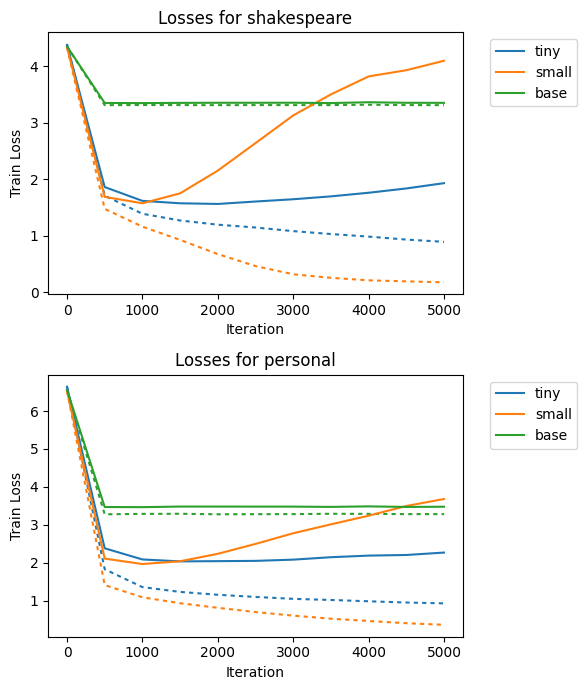

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to clean the tensor format
def clean_tensor_format(val):
    return float(val.replace('tensor(', '').replace(')', ''))


# List of model sizes and datasets
model_sizes = ['tiny', 'small', 'base']
datasets = ['shakespeare', 'personal']

# Create a figure and a set of subplots
if len(datasets) > 1:
    fig, axes = plt.subplots(len(datasets), figsize=(6, 7))  
    axes = axes.flatten()  # flatten only when more than 1 dataset
else:
    fig, axes = plt.subplots(len(datasets), figsize=(6, 7))
    axes = [axes]  # put the single axis into a list to enable iteration

# Iterate over datasets
for dataset_index, dataset in enumerate(datasets):

    # Initialize an empty DataFrame to store all losses for the current dataset
    combined_loss = pd.DataFrame()

    # Iterate over model sizes
    for model_size in model_sizes:

        # Load csv
        csv_path = f'data/model_{model_size}_{dataset}_loss.csv'
        df = pd.read_csv(csv_path)

        # Clean the 'Train Loss' and 'Validation Loss' columns
        df['Train Loss'] = df['Train Loss'].apply(clean_tensor_format)
        df['Validation Loss'] = df['Validation Loss'].apply(clean_tensor_format)

        # Append 'Model Size' column to distinguish the model sizes in the plot
        df['Model Size'] = model_size

        # Concatenate DataFrames
        combined_loss = pd.concat([combined_loss, df])

    # Plot the data
    ax = sns.lineplot(data=combined_loss, x='Iteration', y='Train Loss', hue='Model Size', dashes=(2, 2), ax=axes[dataset_index])
    sns.lineplot(data=combined_loss, x='Iteration', y='Validation Loss', hue='Model Size', ax=axes[dataset_index])
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc=2)
    axes[dataset_index].set_title(f'Losses for {dataset}')

plt.tight_layout()
plt.show()
